In [2]:
import pandas as pd 
import csv
import numpy as np

In [3]:
seoul = pd.read_csv('C:/Users/USER/Downloads/소상공인시장진흥공단_상가(상권)정보_20230930/소상공인시장진흥공단_상가(상권)정보_서울_202309.csv',encoding='utf-8')

# 필요한 컬럼 정보만 가져옵니다
seoul = seoul[['시군구명', '상권업종대분류명', '상권업종중분류명', '위도', '경도']]
seoul

C:\Users\USER\AppData\Local\Temp\ipykernel_22916\555773226.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  seoul = pd.read_csv('C:/Users/USER/Downloads/소상공인시장진흥공단_상가(상권)정보_20230930/소상공인시장진흥공단_상가(상권)정보_서울_202309.csv',encoding='utf-8')


,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
0,광진구,음식,한식,37.568503,127.082832
1,중구,숙박,일반 숙박,37.565708,127.005849
2,노원구,교육,기타 교육,37.649226,127.076956
3,양천구,과학·기술,사진 촬영,37.542117,126.828832
4,강서구,음식,한식,37.560053,126.833022
...,...,...,...,...,...
482954,강남구,음식,기타 간이,37.484681,127.044554
482955,관악구,음식,기타 간이,37.486279,126.940403
482956,구로구,음식,기타 간이,37.490225,126.890242
482957,송파구,소매,종합 소매,37.534453,127.116063


In [4]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482959 entries, 0 to 482958
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   시군구명      482959 non-null  object 
 1   상권업종대분류명  482959 non-null  object 
 2   상권업종중분류명  482959 non-null  object 
 3   위도        482959 non-null  float64
 4   경도        482959 non-null  float64
dtypes: float64(2), object(3)
memory usage: 18.4+ MB


In [5]:
seoul['상권업종중분류명'].value_counts()

상권업종중분류명
한식             47503
이용·미용          28267
기타 간이          28053
섬유·의복·신발 소매    27407
부동산 서비스        24970
               ...  
병원               369
장례식장             327
통신장비 수리          300
조경·유지            107
기타 외국             47
Name: count, Length: 75, dtype: int64

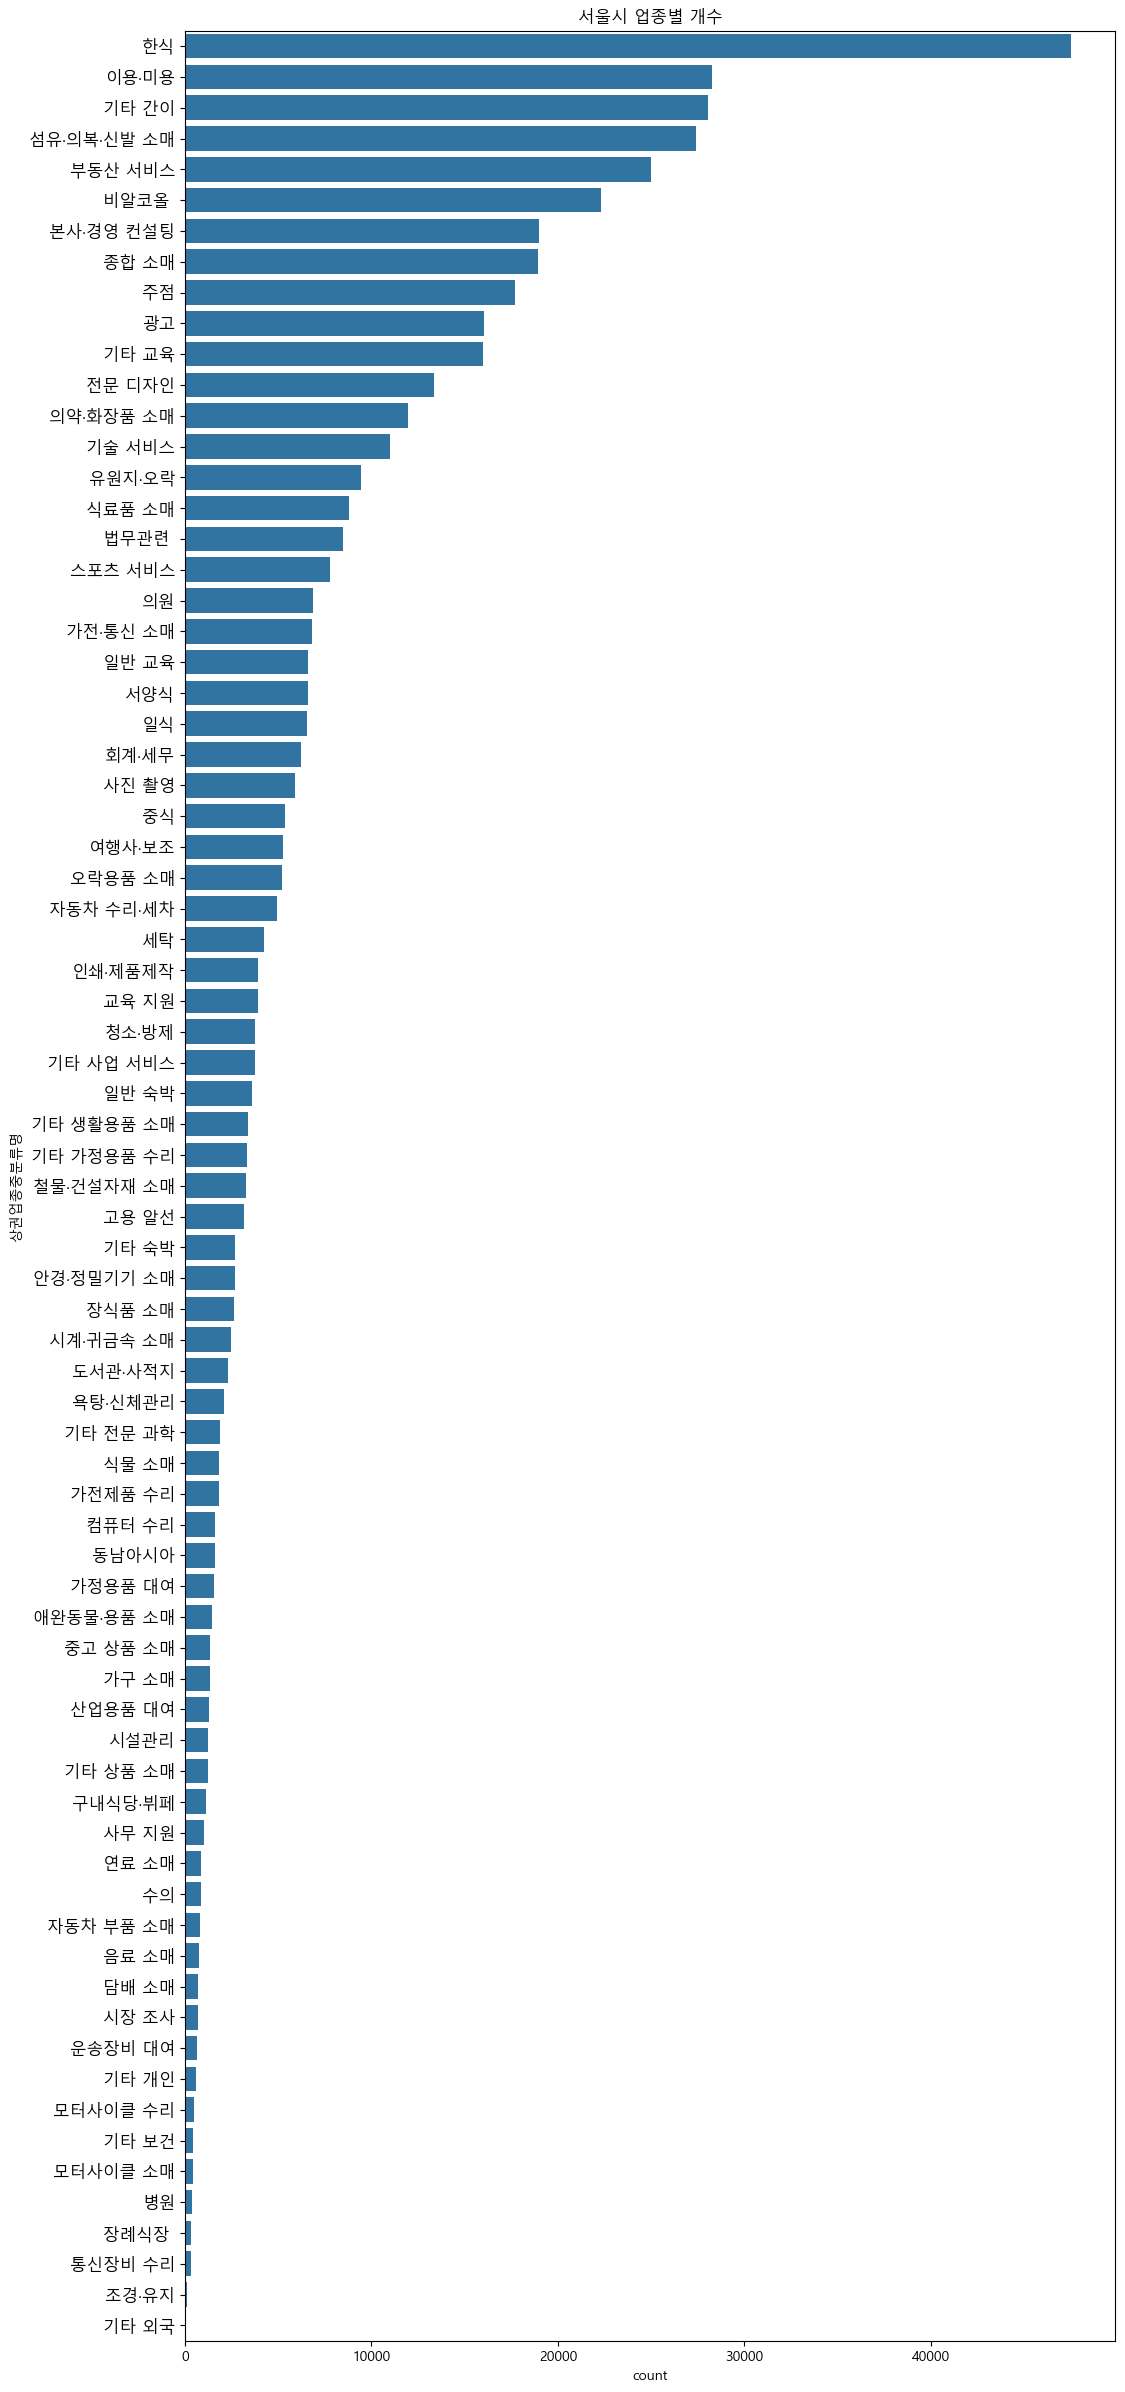

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(12, 30))
sns.countplot(y=seoul['상권업종중분류명'], order=seoul['상권업종중분류명'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('서울시 업종별 개수')
plt.show()

In [7]:
seoul_hansik = seoul.loc[seoul['상권업종중분류명'] == '한식']
seoul_hansik

,시군구명,상권업종대분류명,상권업종중분류명,위도,경도
0,광진구,음식,한식,37.568503,127.082832
4,강서구,음식,한식,37.560053,126.833022
5,송파구,음식,한식,37.507170,127.116136
14,양천구,음식,한식,37.520990,126.834524
27,마포구,음식,한식,37.556086,126.909004
...,...,...,...,...,...
482911,강서구,음식,한식,37.560236,126.836867
482927,광진구,음식,한식,37.553834,127.089814
482932,강남구,음식,한식,37.519597,127.022559
482934,강남구,음식,한식,37.501604,127.034793


In [9]:
import requests
import json
import folium

# 서울 행정구역 GeoJSON 데이터 로드
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
seoul_geo = r.json()

# Folium 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# GeoJSON 데이터를 지도에 추가
folium.GeoJson(seoul_geo).add_to(m)

In [11]:
seoul_group_data = seoul.loc[seoul['상권업종중분류명'] == '한식'].groupby('시군구명')['상권업종중분류명'].count()
seoul_group_data

시군구명
강남구     4133
강동구     1762
강북구     1507
강서구     2366
관악구     1961
광진구     1709
구로구     1737
금천구     1373
노원구     1534
도봉구     1101
동대문구    1858
동작구     1279
마포구     2493
서대문구    1386
서초구     2251
성동구     1562
성북구     1541
송파구     2766
양천구     1297
영등포구    2699
용산구     1391
은평구     1657
종로구     2270
중구      2170
중랑구     1700
Name: 상권업종중분류명, dtype: int64

In [12]:
# Folium 지도 생성
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

# GeoJSON 데이터를 지도에 추가
folium.GeoJson(seoul_geo, name='지역구').add_to(m)

# Choropleth를 이용하여 데이터 시각화
folium.Choropleth(
    geo_data=seoul_geo,
    data=seoul_group_data,
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name='지역구별 한식 수'
).add_to(m)

# 지도 출력
m.save('map2.html')

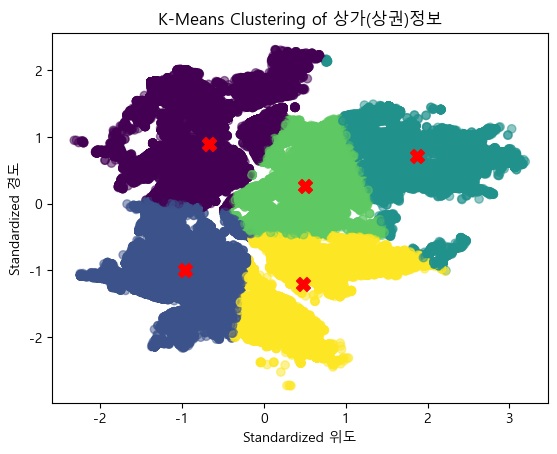

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터 로드 및 전처리
data = pd.read_csv('C:/Users/USER/Downloads/소상공인시장진흥공단_상가(상권)정보_20230930/소상공인시장진흥공단_상가(상권)정보_서울_202309.csv', encoding='utf-8', low_memory=False)
features = data[['위도', '경도']]  # 위치 기반 특성 선택

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-평균 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(scaled_features)
import matplotlib.pyplot as plt

# 클러스터링 결과 시각화
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100)
plt.title('K-Means Clustering of 상가(상권)정보')
plt.xlabel('Standardized 위도')
plt.ylabel('Standardized 경도')
plt.show()
